In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("/content/weatherHistory.csv")

In [3]:
dataset.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
dataset['Formatted Date']=pd.to_datetime(dataset['Formatted Date'],utc=True)
dataset.set_index('Formatted Date', inplace=True)


In [5]:
dataset["Humidity"]= dataset["Humidity"]*100

In [6]:
dataset.head()
dataset.info()
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96453 entries, 2006-03-31 22:00:00+00:00 to 2016-09-09 21:00:00+00:00
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Loud Cover                96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.8+ MB


,0
Summary,0
Precip Type,517
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0
Pressure (millibars),0


In [7]:
# Drop rows with nulls
dataset.dropna(inplace=True)

# Optional: Rename columns
dataset.rename(columns={
    'Temperature (C)': 'Temp',
    'Apparent Temperature (C)': 'App_Temp',
    'Wind Speed (km/h)': 'Wind_Speed',
    'Pressure (millibars)': 'Pressure'
}, inplace=True)


In [8]:
dataset.head()
dataset.info()
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95936 entries, 2006-03-31 22:00:00+00:00 to 2016-09-09 21:00:00+00:00
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Summary                 95936 non-null  object 
 1   Precip Type             95936 non-null  object 
 2   Temp                    95936 non-null  float64
 3   App_Temp                95936 non-null  float64
 4   Humidity                95936 non-null  float64
 5   Wind_Speed              95936 non-null  float64
 6   Wind Bearing (degrees)  95936 non-null  float64
 7   Visibility (km)         95936 non-null  float64
 8   Loud Cover              95936 non-null  float64
 9   Pressure                95936 non-null  float64
 10  Daily Summary           95936 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.8+ MB


,0
Summary,0
Precip Type,0
Temp,0
App_Temp,0
Humidity,0
Wind_Speed,0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0
Pressure,0


In [9]:
# Extract month and day
dataset['Month'] = dataset.index.month
dataset['Day'] = dataset.index.day
dataset['Year'] = dataset.index.year



In [10]:
dataset.head()

,Summary,Precip Type,Temp,App_Temp,Humidity,Wind_Speed,Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure,Daily Summary,Month,Day,Year
Formatted Date,,,,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,89.0,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,3,31,2006
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,86.0,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,3,31,2006
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,89.0,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,4,1,2006
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,83.0,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,4,1,2006
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,83.0,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,4,1,2006


In [11]:
print("Average Temperature:",dataset['Temp'].mean())
print("Max Humidity:",dataset['Humidity'].max())
print("Min Visibility:",dataset['Visibility (km)'].min())

Average Temperature: 11.940975696760804
Max Humidity: 100.0
Min Visibility: 0.0


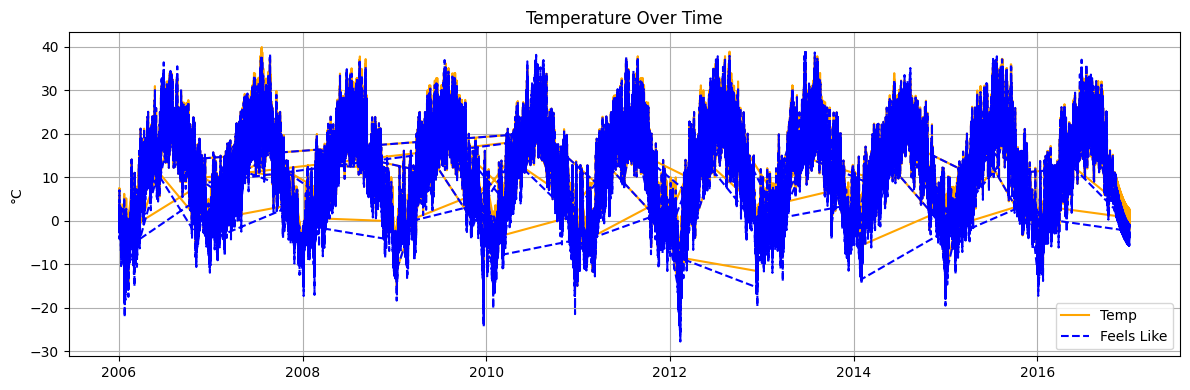

In [12]:
plt.figure(figsize=(12,4))
plt.plot(dataset.index, dataset['Temp'], color='orange', label='Temp')
plt.plot(dataset.index, dataset['App_Temp'], color='blue', linestyle='--', label='Feels Like')
plt.title("Temperature Over Time")
plt.ylabel("°C")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
monthly_avg=dataset.resample("M").mean(numeric_only=True)

<ipython-input-13-1209730058>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg=dataset.resample("M").mean(numeric_only=True)


In [14]:
monthly_avg.head()

,Temp,App_Temp,Humidity,Wind_Speed,Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure,Month,Day,Year
Formatted Date,,,,,,,,,,,
2005-12-31 00:00:00+00:00,0.577778,-4.050000,89.000000,17.114300,140.000000,9.982000,0.0,1016.660000,12.0,31.0,2005.0
2006-01-31 00:00:00+00:00,-1.677942,-4.173708,83.461022,8.894211,161.018817,7.894064,0.0,1021.204960,1.0,16.0,2006.0
2006-02-28 00:00:00+00:00,-0.065394,-2.990716,84.346726,10.957008,197.886905,7.418794,0.0,995.183914,2.0,14.5,2006.0
2006-03-31 00:00:00+00:00,4.559274,1.969780,77.873656,14.421488,195.059140,9.602590,0.0,976.436263,3.0,16.0,2006.0
2006-04-30 00:00:00+00:00,12.635031,12.098827,72.862500,10.930670,191.877778,10.626760,0.0,1013.493694,4.0,15.5,2006.0


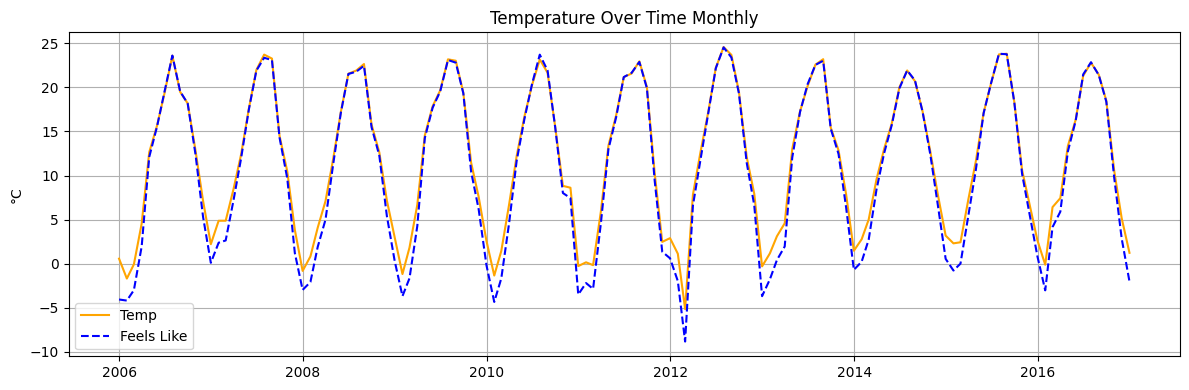

In [16]:
plt.figure(figsize=(12,4))
plt.plot(monthly_avg.index, monthly_avg['Temp'], color='orange', label='Temp')
plt.plot(monthly_avg.index, monthly_avg['App_Temp'], color='blue', linestyle='--', label='Feels Like')
plt.title("Temperature Over Time Monthly")
plt.ylabel("°C")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


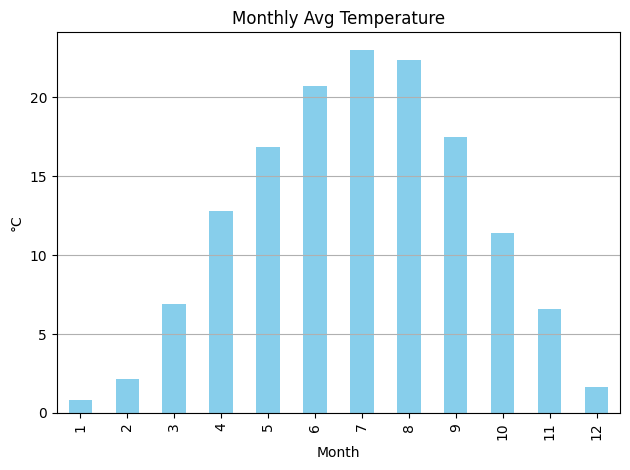

In [18]:
monthly_avg2 = dataset.groupby('Month')['Temp'].mean()
monthly_avg2.plot(kind='bar', color='skyblue')
plt.title("Monthly Avg Temperature")
plt.xlabel("Month")
plt.ylabel("°C")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

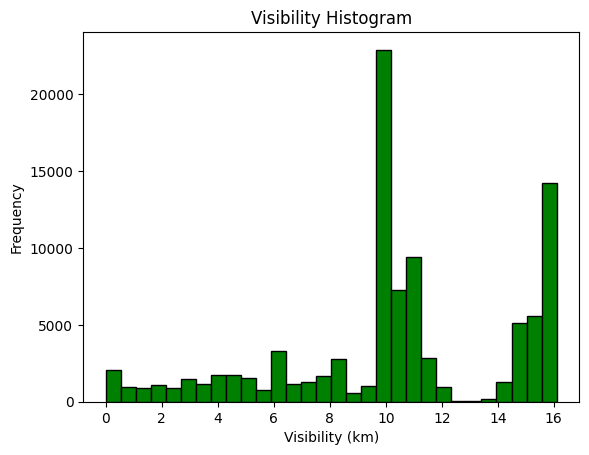

In [19]:
plt.hist(dataset['Visibility (km)'], bins=30, color='green', edgecolor='black')
plt.title("Visibility Histogram")
plt.xlabel("Visibility (km)")
plt.ylabel("Frequency")
plt.show()


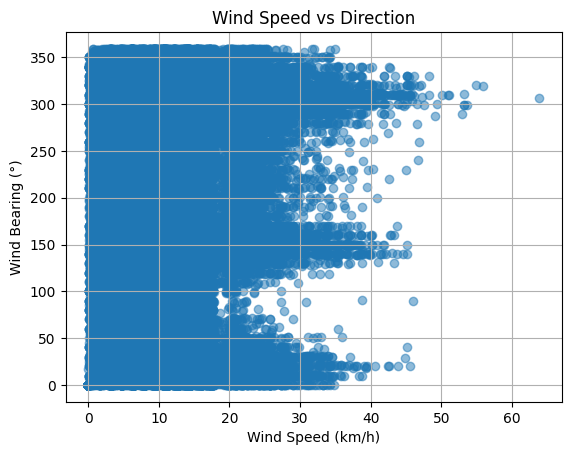

In [20]:
plt.scatter(dataset['Wind_Speed'], dataset['Wind Bearing (degrees)'], alpha=0.5)
plt.title("Wind Speed vs Direction")
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Wind Bearing (°)")
plt.grid(True)
plt.show()


In [22]:
monthly_avg2.to_csv("monthly_avg_temp2.csv")
monthly_avg.to_csv("monthly_avg_temp.csv")
dataset.to_csv("cleaned_weather.csv")
